In [1]:
import geopandas as gpd
import datetime as dt 
import pandas as pd

departements = [
                'departement-78-yvelines',
                'departement-01-ain',
                'departement-25-doubs'
                ]

sd = dt.datetime.strptime('2024-07-31', '%Y-%m-%d').date()
ed = dt.datetime.now().date()
geos = []
for dept in departements:
    d = sd
    while d != ed:
        print(d.strftime('%Y-%m-%d'))
        try:
            geo = gpd.read_file(dept + '/' +'hexagones_'+d.strftime('%Y-%m-%d')+'.geojson')[['scale0', 'id', 'fire_prediction_raw', 'fire_prediction', 'fire_prediction_dept', 'geometry', 'nbfirepoint']]
            geo['departement'] = dept
            geo['date'] = d.strftime('%Y-%m-%d')
            geos.append(geo)
        except Exception as e:
            d += dt.timedelta(days=1)
            continue
        d += dt.timedelta(days=1)

geos = pd.concat(geos)

2024-07-31
2024-08-01
2024-08-02
2024-08-03
2024-08-04
2024-08-05
2024-08-06
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14
2024-07-31
2024-08-01
2024-08-02
2024-08-03
2024-08-04
2024-08-05
2024-08-06
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14
2024-07-31
2024-08-01
2024-08-02
2024-08-03
2024-08-04
2024-08-05
2024-08-06
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14


/tmp/ipykernel_461079/4266155915.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  geos = pd.concat(geos)


In [20]:
geos.groupby('departement')['nbfirepoint'].mean()

departement
departement-01-ain         0.714286
departement-25-doubs       0.387306
departement-78-yvelines    0.177894
Name: nbfirepoint, dtype: float64

In [4]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['nbfirepoint'] > 0)].date.unique()

array(['2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03',
       '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-08',
       '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12',
       '2024-08-13'], dtype=object)

In [5]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['date'] == '2024-08-01')].nbfirepoint.sum()

874.0

In [6]:
geos.departement.unique()

array(['departement-78-yvelines', 'departement-01-ain',
       'departement-25-doubs'], dtype=object)

In [7]:
len(geos)

42940

In [8]:
geos['nbfirepoint'].unique(), geos['nbfirepoint'].sum()

(array([0., 1., 2., 3.]), 20736.0)

In [9]:
import matplotlib.pyplot as plt

In [10]:
geos.date

0       2024-07-31
1       2024-07-31
2       2024-07-31
3       2024-07-31
4       2024-07-31
           ...    
1153    2024-08-14
1154    2024-08-14
1155    2024-08-14
1156    2024-08-14
1157    2024-08-14
Name: date, Length: 42940, dtype: object

In [11]:
geos[geos['date'] == '2024-08-01']['fire_prediction_raw']

0       3.381498
1       2.247457
2       2.839977
3       2.839977
4       2.247457
          ...   
1153    5.724391
1154    5.724391
1155    5.724391
1156    5.724391
1157    5.724391
Name: fire_prediction_raw, Length: 3026, dtype: float64

id
0.0     3.0
1.0     3.0
2.0     4.0
3.0     3.0
4.0     3.0
5.0     2.0
16.0    1.0
17.0    1.0
18.0    2.0
Name: fire_prediction, dtype: object

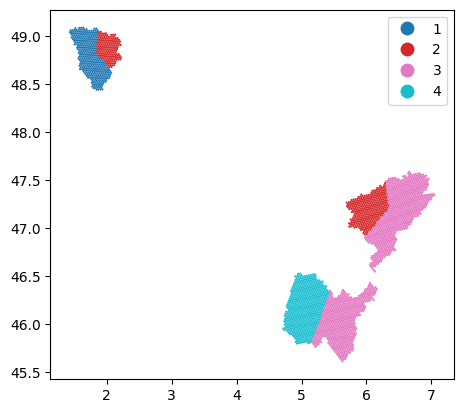

In [12]:
geos[geos['date'] == '2024-08-12'].plot('fire_prediction', categorical=True, legend=True)
geos[geos['date'] == '2024-08-12'].groupby('id')['fire_prediction'].mean()

In [13]:
geos['fire_prediction_raw'].unique()

array([ 4.85158062,  2.59160709,  4.4539938 ,  3.38149834,  2.24745703,
        2.83997679,  3.20191979,  2.52908397,  2.72917366,  2.90016603,
        2.00825071,  2.1754601 ,         nan,  2.32774401,  1.73720515,
        2.16443467,  3.14391875,  1.34489751,  2.06271982,  2.63473725,
        3.07564235,  4.21586037,  1.56222403,  2.63738823,  2.9250083 ,
        0.74132508,  1.24202359,  2.29072356,  1.53442526,  1.38810778,
        2.28676939,  4.85103083,  3.10815406,  5.63513708,  5.48589706,
        2.42633653,  3.62450814,  2.01570415,  1.53960049,  2.24102235,
        8.12676811,  1.36040068,  2.93146992,  4.24895859, 11.21186447,
       10.22338867, 10.87867355,  9.29551125,  9.29994011, 10.82124424,
        7.65580702,  7.57996702, 11.01316929, 10.15558052,  7.10559273,
        8.41974068, 14.4422121 ,  9.218256  ,  8.74940872, 12.38268661,
        6.62917852,  7.7626133 , 13.31328773,  8.30774975,  7.69491434,
       13.24599457,  8.34196663,  6.58751535, 14.78928661,  7.54

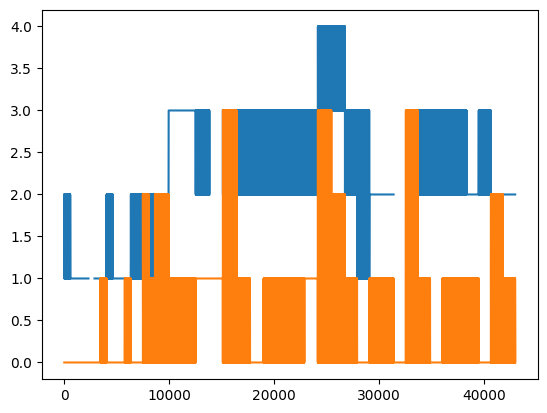

In [14]:
plt.plot(geos['fire_prediction'].values)
plt.plot(geos['nbfirepoint'].values)

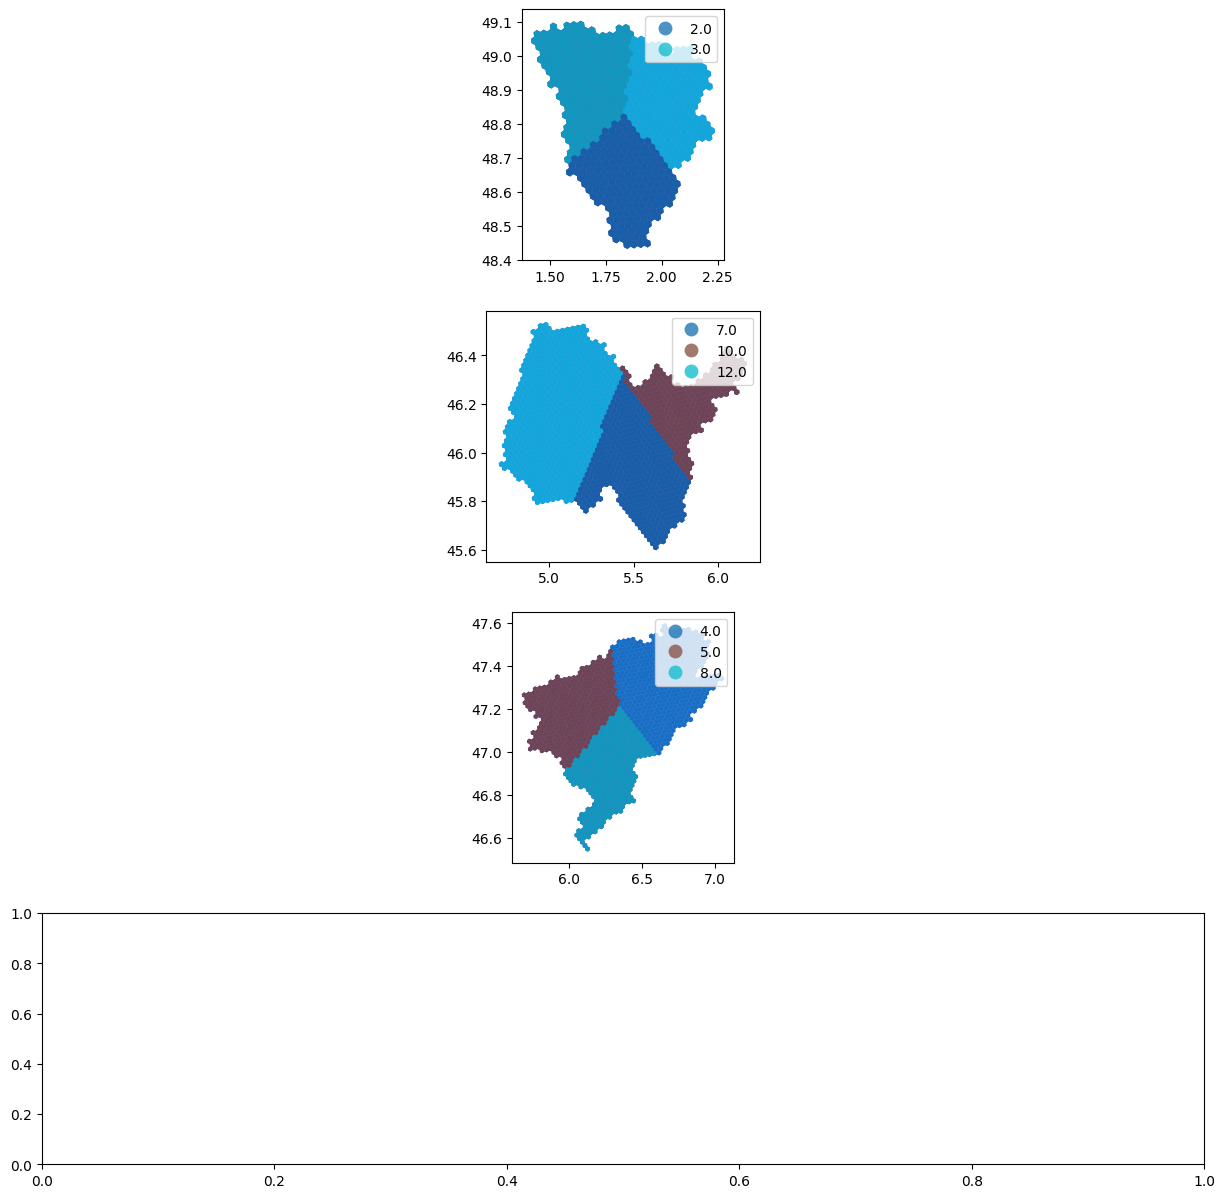

In [15]:
gb = geos.groupby(['scale0', 'departement'])[['fire_prediction']].mean().reset_index()
gb2 = geos.groupby(['scale0', 'departement'])[['nbfirepoint']].sum().reset_index()
gb['nbfirepoint'] = gb2['nbfirepoint']
gb = gb.set_index('scale0').join(other=geos[geos['date'] ==  '2024-08-01'][['geometry', 'scale0']].set_index('scale0'), on='scale0').reset_index()
gb = gpd.GeoDataFrame(gb, geometry=gb.geometry)

fig, ax = plt.subplots(len(departements) + 1, figsize=(15,15))

for i, dept in enumerate(departements):
    gb[gb['departement'] == dept].plot(column='fire_prediction', vmin=1, vmax=6, legend=True, ax=ax[i], cmap='jet')
    if len(gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)]) == 0:
        continue
    gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)].plot(column='nbfirepoint', ax=ax[i], alpha=0.8, legend=True, categorical=True)

['2024-07-31' '2024-08-01' '2024-08-02' '2024-08-03' '2024-08-04'
 '2024-08-05' '2024-08-06' '2024-08-07' '2024-08-08' '2024-08-09'
 '2024-08-10' '2024-08-11' '2024-08-12' '2024-08-13' '2024-08-14']
date
2024-07-31      0.0
2024-08-01      0.0
2024-08-02      0.0
2024-08-03      0.0
2024-08-04      0.0
2024-08-05      0.0
2024-08-06    391.0
2024-08-07      0.0
2024-08-08      0.0
2024-08-09      0.0
2024-08-10    391.0
2024-08-11      0.0
2024-08-12      0.0
2024-08-13    570.0
2024-08-14    185.0
Name: nbfirepoint, dtype: float64


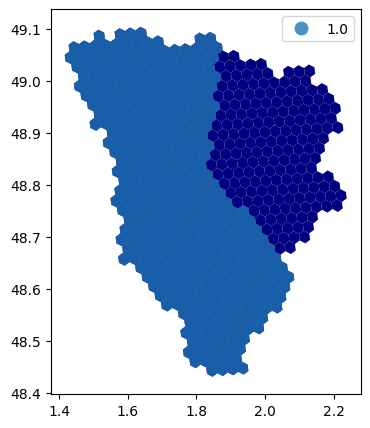

In [16]:
# Yvelines

if 'departement-78-yvelines' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-78-yvelines') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-06'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-06') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

['2024-07-31' '2024-08-01' '2024-08-02' '2024-08-03' '2024-08-04'
 '2024-08-05' '2024-08-06' '2024-08-07' '2024-08-08' '2024-08-09'
 '2024-08-10' '2024-08-11' '2024-08-12' '2024-08-13']
date
2024-07-31     836.0
2024-08-01     874.0
2024-08-02     247.0
2024-08-03    1292.0
2024-08-04    1292.0
2024-08-05    1881.0
2024-08-06     247.0
2024-08-07       0.0
2024-08-08     247.0
2024-08-09     418.0
2024-08-10     665.0
2024-08-11    1292.0
2024-08-12    2128.0
2024-08-13    1501.0
Name: nbfirepoint, dtype: float64


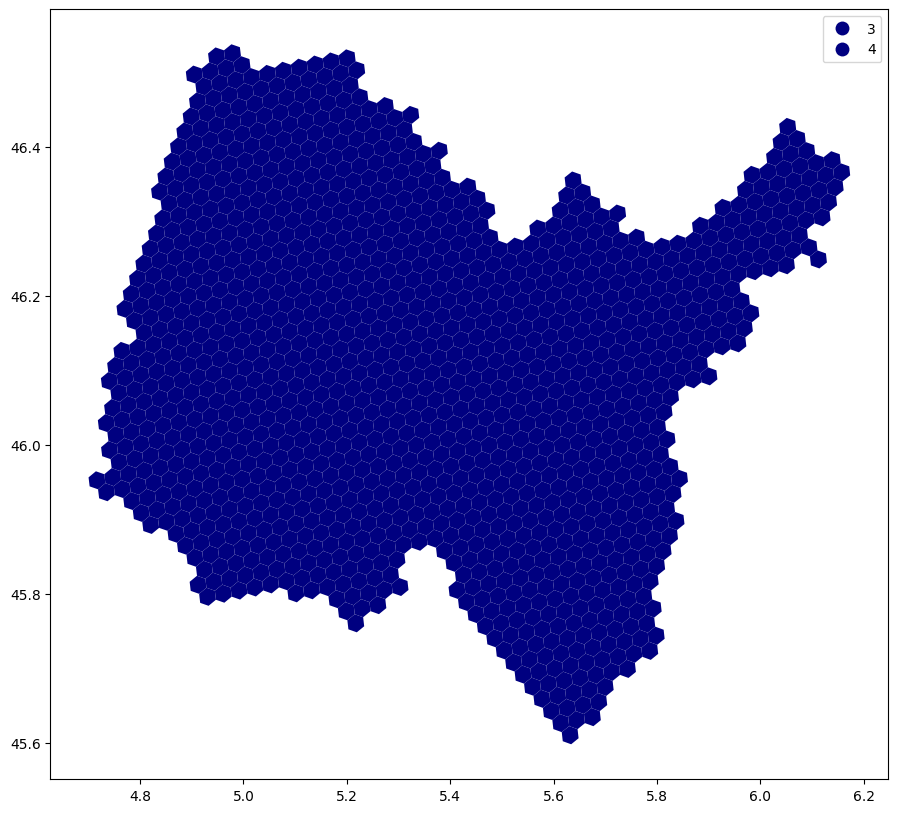

In [17]:
# Ain

if 'departement-01-ain' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-01-ain') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(15,10))
    geosFYvelines[geosFYvelines['date'] == '2024-08-12'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    #geosFYvelines[(geosFYvelines['date'] == '2024-08-12') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

['2024-08-01' '2024-08-02' '2024-08-03' '2024-08-04' '2024-08-05'
 '2024-08-06' '2024-08-07' '2024-08-08' '2024-08-09' '2024-08-10'
 '2024-08-11' '2024-08-12' '2024-08-13' '2024-08-14']
date
2024-08-01     480.0
2024-08-02       0.0
2024-08-03     323.0
2024-08-04     480.0
2024-08-05       0.0
2024-08-06    1324.0
2024-08-07     355.0
2024-08-08       0.0
2024-08-09     678.0
2024-08-10     678.0
2024-08-11     323.0
2024-08-12       0.0
2024-08-13    1315.0
2024-08-14     323.0
Name: nbfirepoint, dtype: float64


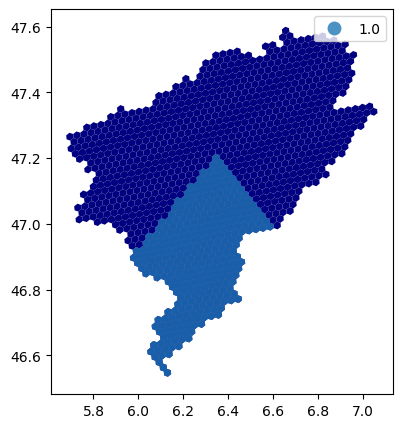

In [19]:
# Doubs

if 'departement-25-doubs' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-25-doubs') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-14'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-14') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

In [21]:
geosFYvelines[geosFYvelines['date'] == '2024-08-01']['fire_prediction'].unique()

array([3, 2], dtype=object)

In [22]:
geos.date.values[0]

'2024-07-31'

In [23]:
gb3 = geos.groupby(by=['id', 'date', 'departement'])[['fire_prediction', 'fire_prediction_raw']].mean().reset_index()
gb4 = geos.groupby(by=['id', 'date'])[['nbfirepoint']].sum().reset_index()
gb3['nbfirepoint'] = gb4['nbfirepoint']
gb3.sort_values('date', inplace=True)
gb3

,id,date,departement,fire_prediction,fire_prediction_raw,nbfirepoint
0,0.0,2024-07-31,departement-01-ain,2.0,4.248959,836.0
99,17.0,2024-07-31,departement-78-yvelines,1.0,2.591607,0.0
28,2.0,2024-07-31,departement-01-ain,2.0,4.248959,0.0
114,18.0,2024-07-31,departement-78-yvelines,2.0,4.851581,0.0
14,1.0,2024-07-31,departement-01-ain,2.0,4.248959,0.0
...,...,...,...,...,...,...
98,16.0,2024-08-14,departement-78-yvelines,1.0,2.931470,0.0
55,3.0,2024-08-14,departement-25-doubs,2.0,2.518811,323.0
69,4.0,2024-08-14,departement-25-doubs,2.0,5.006810,0.0
83,5.0,2024-08-14,departement-25-doubs,2.0,2.872025,0.0


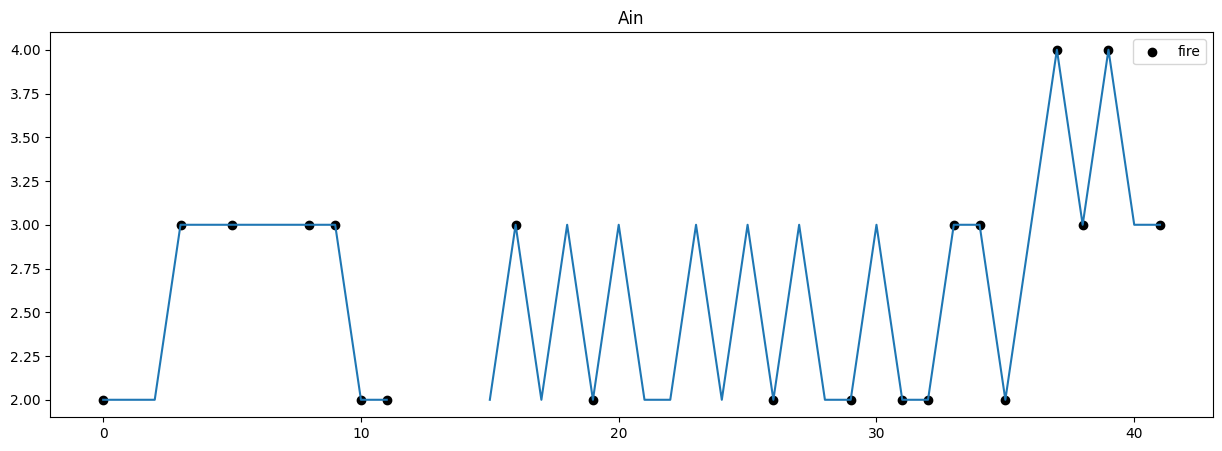

In [24]:
import numpy as np

if 'departement-01-ain' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Ain')

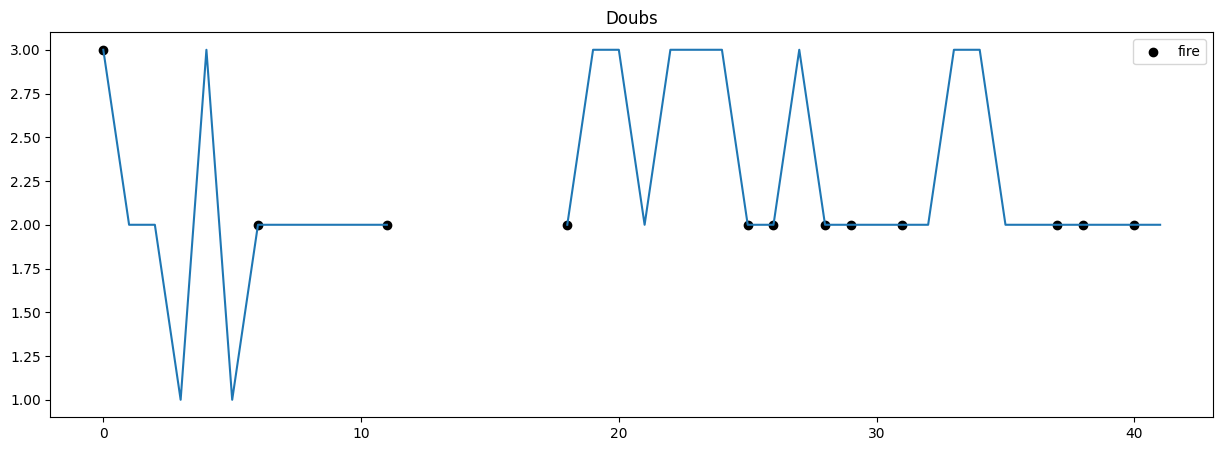

In [25]:
import numpy as np

if 'departement-25-doubs' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Doubs')

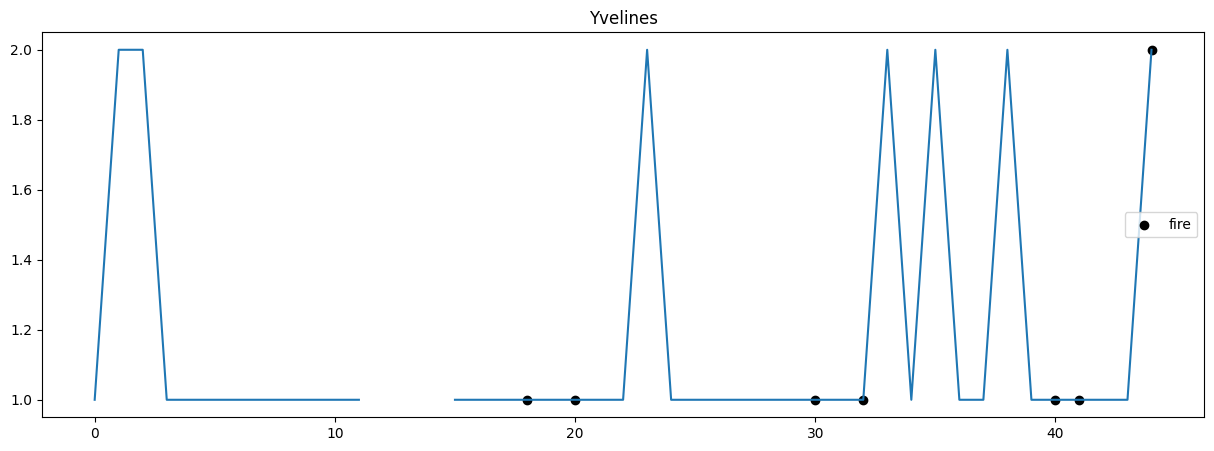

In [26]:
import numpy as np

if 'departement-78-yvelines' in geos.departement.unique():

    val = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Yvelines')

In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def my_f1_score(ytrue , ypredNumpy, isBin : bool, weights = None):

    bounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ytrueRegNumpy = ypredNumpy
    ytrueNumpy = ytrue

    weightsNumpy = np.ones(ypredNumpy.shape[0])
    maxi = np.max(ypredNumpy)

    bestScore = 0.0
    prec = 0.0
    rec = 0.0
    bestBound = 0.0
    for bound in bounds:
        if isBin:
            yBinPred = (ypredNumpy > bound * maxi).astype(int)
        else:
            yBinPred = (ytrueRegNumpy > bound * maxi).astype(int)

        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        if f1 > bestScore:
            bestScore = f1
            bestBound =  bound
            prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
            rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
    
    if not isBin:
        yBinPred = (ypredNumpy > bestBound * maxi).astype(int)
        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        bestScore = f1
        bestBound =  bound
        prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)

    return (bestScore, prec, rec, bestBound, ypredNumpy > bestBound * maxi)

res = my_f1_score((gb3.nbfirepoint > 0).astype(int), gb3.fire_prediction_raw.values, None)
res

/home/caron/Bureau/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0,
 0.0,
 0.0,
 0.9,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, Fal

In [28]:
def class_risk(ytrue, yclass) -> dict:
    
    res = {}
    uniqueClass = np.unique(yclass)
    for c in uniqueClass:
        classIndex = np.argwhere(yclass == c)
        classBin = ytrue[classIndex] > 0
        meanF = round(np.mean(classBin), 3)
        res[c] = (meanF)
    return res

cr = class_risk(gb3.nbfirepoint.values, gb3.fire_prediction.values)
cr

/home/caron/Bureau/.conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/caron/Bureau/.conda/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{1.0: 0.162,
 2.0: 0.438,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 3.0: 0.333,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 4.0: 1.0}

(0.0, 1.0)

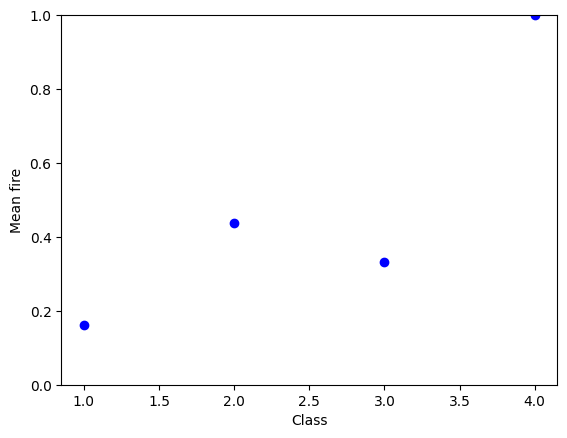

In [29]:
for key, val in cr.items():
    plt.scatter(key, val, c='blue')

plt.ylabel('Mean fire')
plt.xlabel('Class')
plt.ylim(0, 1)